En aquest arxiu es mostra un anàlisi descriptiu per a les dades que el valor de *PreuHab* és superior a 272 euros.

## Importar

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
import re
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

In [2]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df1 = pd.read_csv(mainpath + "dfextP.csv", sep = ",")
df1.diaAño = df1.diaAño.asobject

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'asobject' is deprecated. Use 'astype(object)' instead
  """


In [3]:
df1.head()
df1.shape

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
0,TOS,2018-03-31,Huespedes,FAM,PC,DESCONOCIDO,DESCONOCIDO,ES,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,278.681818,90
1,TOS,2018-03-30,Huespedes,FAM,PC,DESCONOCIDO,DESCONOCIDO,ES,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,290.909090,89
2,TOS,2018-04-01,Huespedes,SUI,PC,DESCONOCIDO,DESCONOCIDO,ES,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,276.472728,91
3,PAV,2018-04-01,Otros,DBL,PC,DESCONOCIDO,DESCONOCIDO,ES,1,1,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,327.390911,327.390911,327.390911,202.809092,231.154549,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,163.354547,91
4,MME,2018-04-05,Otros,DBL,MP,DESCONOCIDO,DESCONOCIDO,CE,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,553.500000,553.500000,553.500000,553.500000,553.500000,553.500000,553.500000,553.500000,553.500000,553.500000,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,85.363636,

(2375, 115)

## Llistes segons variable

In [4]:
df1.describe(include = 'object').columns.tolist()
df1.describe(include = 'int64').columns.tolist()
df1.describe(include = 'float64').columns.tolist()
df1.describe(include = 'int32').columns.tolist()

['idhotel',
 'fechaocupacion',
 'idcliente',
 'idtipohab',
 'idregimen',
 'idsegmento',
 'id_canal',
 'idpais_cliente',
 'diaAño']

['NHab',
 'S1H',
 'S2H',
 'S3H',
 'S4H',
 'S5H',
 'S6H',
 'S7H',
 'S8H',
 'S9H',
 'S10H',
 'S11H',
 'S12H',
 'S13H',
 'S14H',
 'S15H',
 'S16H',
 'S17H',
 'S18H',
 'S19H',
 'S20H',
 'S21H',
 'S22H',
 'S23H',
 'S24H',
 'S25H',
 'S26H',
 'S27H',
 'S28H',
 'S29H',
 'S30H',
 'S31H',
 'S32H',
 'S33H',
 'S34H',
 'S35H',
 'S36H',
 'S37H',
 'S38H',
 'S39H',
 'S40H',
 'S41H',
 'S42H',
 'S43H',
 'S44H',
 'S45H',
 'S46H',
 'S47H',
 'S48H',
 'S49H',
 'S50H',
 'S51H',
 'S52H']

['PreuHab',
 'S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37',
 'S38',
 'S39',
 'S40',
 'S41',
 'S42',
 'S43',
 'S44',
 'S45',
 'S46',
 'S47',
 'S48',
 'S49',
 'S50',
 'S51',
 'S52']

ValueError: No objects to concatenate

## Funcions

In [5]:
def habitacionsPerCategoria(categoria, df):
    cat = []
    habCat = []
    pHabCat = []
    for c in categoria.unique():
        cat.append(c) ## llista amb els valors unics de la categoria
        habCat.append(sum(df[categoria==c]['NHab'])) ## suma d'habitacions
        pHabCat.append(round(sum(df[categoria==c]['NHab'])*100/sum(df['NHab']),3)) ## percentatges
    return pd.DataFrame(list(zip(cat, habCat, pHabCat)), columns = ['id', 'Total habitacions', 'Percentatge %'])

In [6]:
def filtroMenorQue5(lista):
    if(lista < 5):
        return True
    else:
        return False

In [7]:
def llistaHotel(hotel, df):
    l = list(df[df['idhotel']==hotel]['NHab'])
    return l

# Anàlisi descriptiu

## Variable objectiu

In [8]:
df1['NHab'].describe()

count    2375.000000
mean        2.774737
std         4.165211
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       108.000000
Name: NHab, dtype: float64

#### Histogrames

Text(0.5, 1.0, "Número d'habitacions ocupades")

Text(0.5, 0, 'Habitacions')

Text(0, 0.5, 'Recompte')

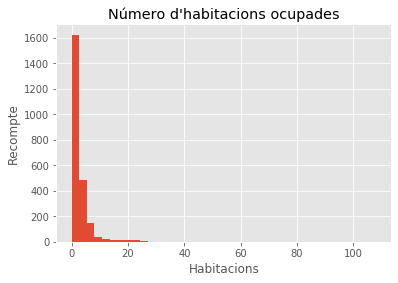

In [9]:
plt.title("Número d'habitacions ocupades")
plt.xlabel('Habitacions')
plt.ylabel('Recompte')
plt.show(plt.hist(df1['NHab'], bins = 40))


#df1[df1['NHab']<40]['NHab']

#### Distribució

Text(0.5, 1.0, "Distribució Número d'habitacions")

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

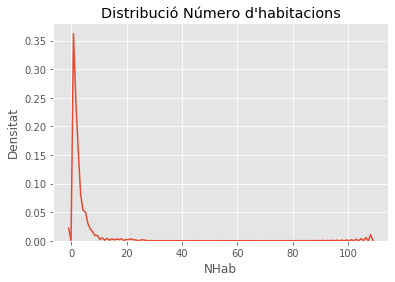

In [10]:
plt.title("Distribució Número d'habitacions")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
plt.show(sns.distplot(df1.NHab, hist = False))


#### Boxplots

Text(0.5, 1.0, "Boxplot Número d'habitacions")

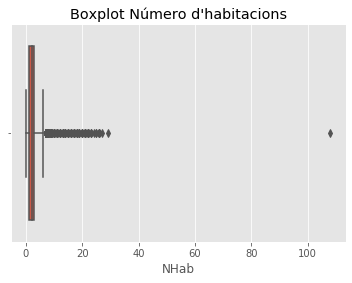

In [11]:
plt.title("Boxplot Número d'habitacions")
plt.show(sns.boxplot(x = df1['NHab']))


## Variables categòriques

### Hotel

#### Anàlisi univariat

In [12]:
df1.idhotel.unique()

array(['TOS', 'PAV', 'MME', 'TAU', 'DON', 'AVS'], dtype=object)

Text(0.5, 1.0, 'ID hotel')

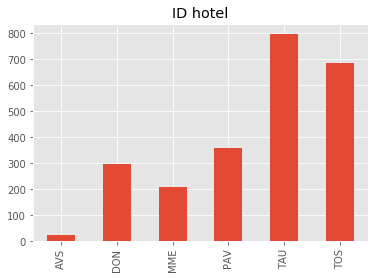

In [13]:
plt.title('ID hotel')
plt.show(df1['idhotel'].value_counts().sort_index().plot.bar())


In [14]:
h = pd.concat([df1['idhotel'].value_counts().sort_index()/len(df1)*100, 
                df1['idhotel'].value_counts().sort_index()], axis = 1)
h.columns = ['%', 'Recompte']
h.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
TAU,33.557895,797
TOS,28.884211,686
PAV,15.200000,361
DON,12.505263,297
MME,8.842105,210
AVS,1.010526,24



#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

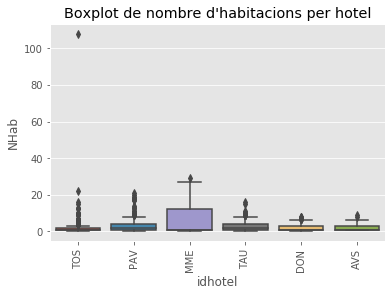

In [15]:
plt.title("Boxplot de nombre d'habitacions per hotel")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df1))

### Client

#### Anàlisi univariat

Text(0.5, 1.0, 'ID client')

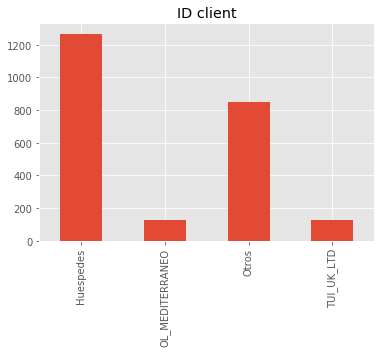

In [16]:
plt.title('ID client')
plt.show(df1['idcliente'].value_counts().sort_index().plot.bar())



In [17]:
cl = pd.concat([df1['idcliente'].value_counts().sort_index()/len(df1)*100, 
                df1['idcliente'].value_counts().sort_index()], axis = 1)
cl.columns = ['%', 'Recompte']
cl.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
Huespedes,53.389474,1268
Otros,35.873684,852
TUI_UK_LTD,5.431579,129
OL_MEDITERRANEO,5.305263,126


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

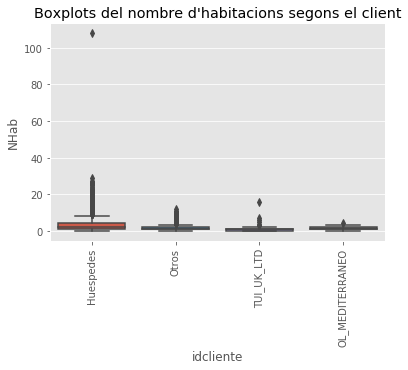

In [18]:
plt.title("Boxplots del nombre d'habitacions segons el client")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df1))



### Tipus Habitació


#### Anàlisi univariat

Text(0.5, 1.0, "Tipus d'habitació")

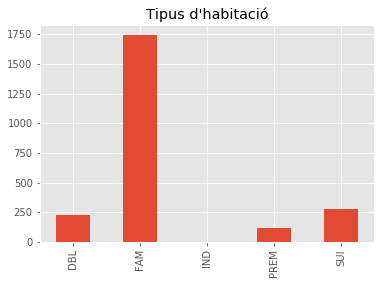

In [19]:
plt.title("Tipus d'habitació")
plt.show(df1['idtipohab'].value_counts().sort_index().plot.bar())

In [20]:
hab = pd.concat([df1['idtipohab'].value_counts().sort_index()/len(df1)*100, 
                df1['idtipohab'].value_counts().sort_index()], axis = 1)
hab.columns = ['%', 'Recompte']
hab.sort_values(by=['Recompte'], ascending = False)



,%,Recompte
FAM,73.473684,1745
SUI,11.831579,281
DBL,9.684211,230
PREM,4.968421,118
IND,0.042105,1


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

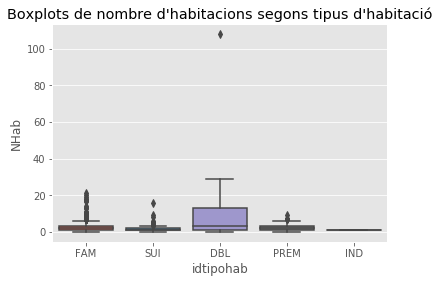

In [21]:
plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df1))


##### Comportament de idtiohab amb idhotel

S'analitza el tipus d'habitació que ven cada hotel

In [22]:
hotelHab = pd.crosstab(df1.idhotel, df1.idtipohab, margins = True, margins_name = 'Total')
hotelHab


idtipohab,DBL,FAM,IND,PREM,SUI,Total
idhotel,,,,,,
AVS,0,0,0,0,24,24
DON,8,288,0,1,0,297
MME,115,95,0,0,0,210
PAV,15,343,0,3,0,361
TAU,24,771,0,0,2,797
TOS,68,248,1,114,255,686
Total,230,1745,1,118,281,2375


### Règim

#### Anàlisi univariat

Text(0.5, 1.0, 'Règim')

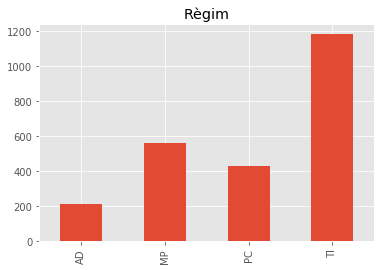

In [23]:
plt.title('Règim')
plt.show(df1['idregimen'].value_counts().sort_index().plot.bar())

In [24]:
r = pd.concat([df1['idregimen'].value_counts().sort_index()/len(df1)*100, 
                df1['idregimen'].value_counts().sort_index()], axis = 1)
r.columns = ['%', 'Recompte']
r.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
TI,49.684211,1180
MP,23.452632,557
PC,17.936842,426
AD,8.926316,212


#### Anàlisi bivariat 

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

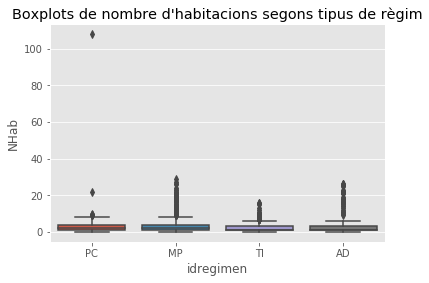

In [25]:
plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df1))



### Segment

#### Anàlisi univariat

Text(0.5, 1.0, 'Segment')

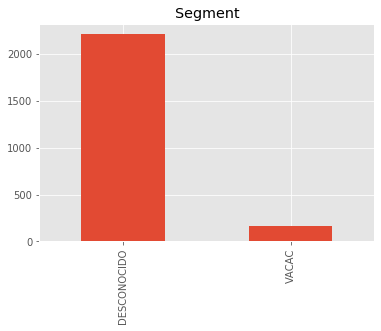

In [26]:
plt.title("Segment")
plt.show(df1['idsegmento'].value_counts().sort_index().plot.bar())

In [27]:
s = pd.concat([df1['idsegmento'].value_counts().sort_index()/len(df1)*100, 
                df1['idsegmento'].value_counts().sort_index()], axis = 1)
s.columns = ['%', 'Recompte']
s.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DESCONOCIDO,93.136842,2212
VACAC,6.863158,163


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

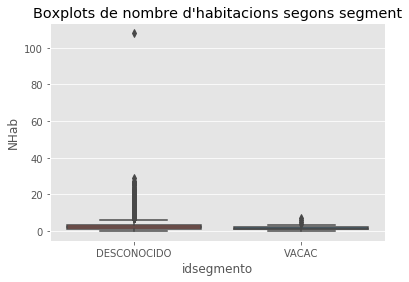

In [28]:
plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df1))


### Canal

#### Anàlisi univariat

Text(0.5, 1.0, 'Canal')

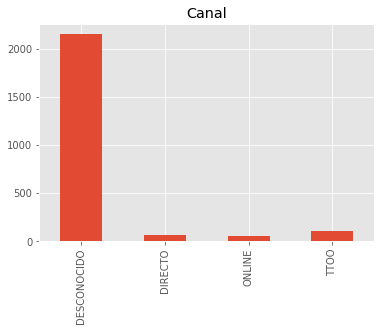

In [29]:
plt.title("Canal")
plt.show(df1['id_canal'].value_counts().sort_index().plot.bar())

In [30]:
c = pd.concat([df1['id_canal'].value_counts().sort_index()/len(df1)*100, 
               df1['id_canal'].value_counts().sort_index()], axis = 1)
c.columns = ['%', 'Recompte']
c.sort_values(by=['Recompte'], ascending = False)


,%,Recompte
DESCONOCIDO,90.400000,2147
TTOO,4.589474,109
DIRECTO,2.694737,64
ONLINE,2.315789,55



#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

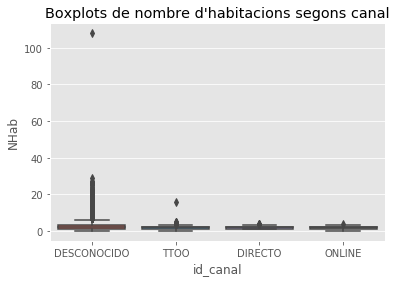

In [31]:
plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df1))

### País client

#### Anàlisi univariat

Text(0.5, 1.0, "País de l'agència client")

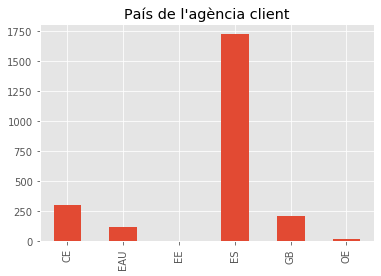

In [32]:
plt.title("País de l'agència client")
plt.show(df1['idpais_cliente'].value_counts().sort_index().plot.bar())

In [33]:
pc = pd.concat([df1['idpais_cliente'].value_counts().sort_index()/len(df1)*100, 
           df1['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc.columns = ['%', 'Recompte']
pc.sort_values(by = 'Recompte', ascending = False)


,%,Recompte
ES,72.673684,1726
CE,12.589474,299
GB,8.842105,210
EAU,5.010526,119
OE,0.715789,17
EE,0.168421,4


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

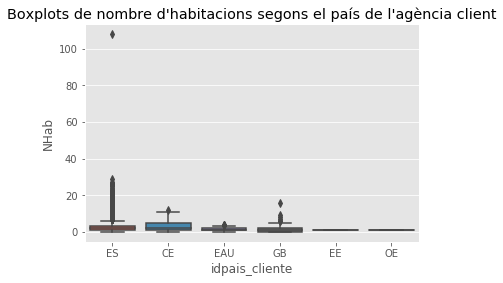

In [34]:
plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df1))



### Data

Text(0.5, 1.0, "Reserves d'habitacions segons el dia de l'any")

Text(0.5, 0, "Dia de l'any")

Text(0, 0.5, 'Nº habitacions reservades')

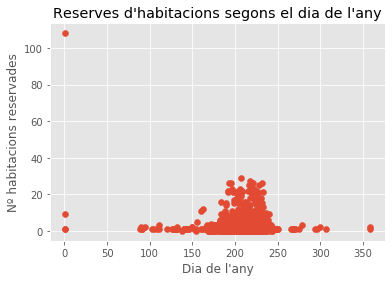

In [35]:
plt.title("Reserves d'habitacions segons el dia de l'any")
plt.xlabel("Dia de l'any")
plt.ylabel("Nº habitacions reservades")
plt.scatter(df1['diaAño'],df1['NHab'])

## Variables numèriques

### Preu mig

#### Anàlisi univariat

In [36]:
df1['PreuHab'].describe()

count    2375.000000
mean      336.529222
std        68.867726
min       272.045454
25%       291.980163
50%       317.600000
75%       353.090910
max       713.005287
Name: PreuHab, dtype: float64

Text(0.5, 1.0, 'Boxplot del preu mig')

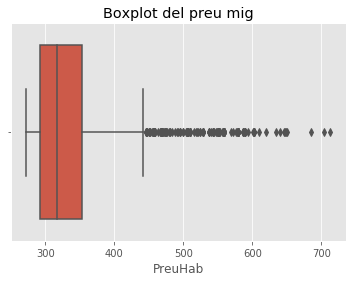

In [37]:
plt.title("Boxplot del preu mig")
plt.show(sns.boxplot(df1['PreuHab']))



Text(0.5, 1.0, 'Preu mig habitació')

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Recompte')

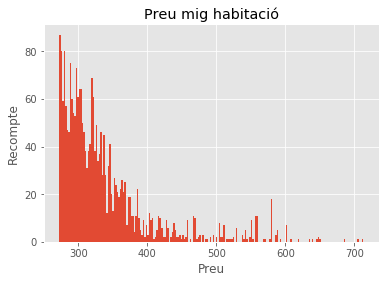

In [38]:
plt.title("Preu mig habitació")
plt.xlabel('Preu')
plt.ylabel('Recompte')
plt.show(plt.hist(df1['PreuHab'], bins = 200))

#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el preu mig")

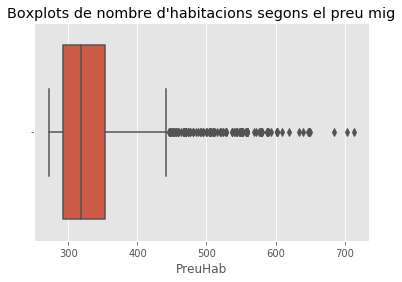

In [39]:
plt.title("Boxplots de nombre d'habitacions segons el preu mig")
plt.show(sns.boxplot(x="PreuHab", data=df1))


# Conclusions de l'apartat

Les diferències més destacables respecte l'anàlisi descriptiu original es troben en la variable *idtipohab* on les habitacions familiars representen un 74% de les dades i les dobles un 10%, mentre que en l'original representen un 23% i un 60% respectivament. És similar el cas de la variable *idregimen*, on succeeix el mateix però per als règims tot inclós i mitja pensió. 

Finalment també esmentar que el país d'on provenen un 72% d'aquestes dades és Espanya, lo que suposa un augment de 30 punts respecte l'anàlisi original.